# Машинное обучение

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [56]:
import numpy as np
from numpy.linalg import norm

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score


Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [4]:
def max_element(arr):
    max_el = -float('inf')
    i = 0
    for i in range(arr.shape[0]-1):
        if (arr[i] == 0):
            max_el = max(max_el, arr[i+1])
    return max_el if max_el!=-float('inf') else None

In [5]:
print(max_element(np.array([1, 2, 3])))
print(max_element(np.array([1,0,-1,2])))
print(max_element(np.array([-1,0,0,1])))

None
-1
1


Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [6]:
def nearest_value(X, v):
    nearest_value = float('inf')
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if abs(v - X[i][j]) < abs(nearest_value - X[i][j]):
                nearest_value = X[i][j]
    return nearest_value

In [7]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [8]:
def scale(X):
    m, n = X.shape
    mean = np.mean(X, 0)
    std = np.std(X, 0, ddof = 1)
    return (X - np.resize(mean, (m,n))) / std if 0 not in std else "Zero Division" 

In [19]:
scale(np.array([[3, 9, 1],
                [1, 7, 4],
                [1, 4, 5]]))

array([[ 1.15470054,  0.92717265, -1.12089708],
       [-0.57735027,  0.13245324,  0.32025631],
       [-0.57735027, -1.05962589,  0.80064077]])

 Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [20]:
def trace(X) -> int:
    m, n = X.shape
    trace = 0
    if m!=n:
        return trace #след существует только для квадратных матриц
    else:
        for i in range(n):
            trace+=X[i][i]
    return trace

In [21]:
"""
0 1 2
3 4 5 
6 7 8
"""
trace(np.arange(0,9).reshape((3, 3)))


12

In [22]:
def transpose(X) -> np.array:
    m, n = X.shape
    XT = np.zeros((n,m))
    for i in range(m):
        for j in range(n):
            XT[j][i] = X[i][j]
    return XT

In [23]:
"""
0 1
2 3
4 5
6 7
8 9
"""
transpose(np.arange(0,10).reshape((5, 2)))

array([[0., 2., 4., 6., 8.],
       [1., 3., 5., 7., 9.]])

In [24]:
def minmax(A)->tuple:
    m,n = A.shape
    min_ = float('inf')
    max_ = -min_
    for i in range(m):
        for j in range(n):
            if A[i][j] > max_:
                max_ = A[i][j]
            if A[i][j] < min_:
                min_ = A[i][j]
    return min_, max_

In [25]:
minmax(np.random.normal(10, 1, size = (5,5)))

(7.854424228239102, 11.852510425770225)

In [32]:
def frobNorm(A):
    return np.linalg.norm(A)
A  = np.random.randint(0,10,size = (3,3))
print(frobNorm(A))
A = np.array([[1,0],[0,1]])
print(frobNorm(A))

9.433981132056603
1.4142135623730951


In [26]:
def eigenvalues(A):
    return np.linalg.eig(A)

In [30]:
A  = np.random.randint(0,10,size = (3,3))
print(eigenvalues(A))
A = np.array([[1,0],[0,1]])
print(eigenvalues(A))

[18.61207857  4.78140039 -2.39347896]
[1. 1.]


In [31]:
def determinant(A):
    return np.linalg.det(A)
A  = np.random.randint(0,10,size = (3,3))
print(determinant(A))
A = np.array([[1,0],[0,1]])
print(determinant(A))

95.99999999999999
1.0


In [33]:
def inverse(A):
    return np.linalg.inv(A)
A  = np.random.randint(0,10,size = (3,3))
print(inverse(A))
A = np.array([[1,0],[0,1]])
print(inverse(A))

[[-0.02    0.16    0.    ]
 [-0.0925 -0.01    0.125 ]
 [ 0.14   -0.12    0.    ]]
[[1. 0.]
 [0. 1.]]


In [36]:
def get_stats(X):
    print("Matrix = \n", X)
    
    print("Determinant: ")
    print(determinant(X))
    print("Trace: ")
    print(trace(X))
    print("Min and Max elements: ")
    print(minmax(X))
    print("Frob Norm: ")
    print(frobNorm(X))
    print("Eigenvalues: ")
    print(eigenvalues(X))
    print("Inverse: ")
    print(inverse(X))

In [37]:
X = np.random.normal(10, 1, size = (10,10))
get_stats(X)

Matrix = 
 [[11.15310536 10.81391025  9.59995102  9.5721184   9.59369886 10.67633462
   8.62423336 10.68846255 11.07458547 10.56007269]
 [ 8.8944566  11.55650892  9.58076367  7.95540488 10.21646867 11.55623558
  10.05062547 11.76252969 10.56536304 10.64310155]
 [ 9.79012552  8.80771242 10.65235492  9.3636689  11.41976733 10.17500558
   9.0890083  10.35648562  9.37646899  8.4747513 ]
 [10.6115352   8.92113078 11.12142132  9.26417649 10.07199874  9.78052134
   9.52876827 11.03429276 10.2770908   9.76916617]
 [10.72681328  9.66703708  9.32575433  9.34999024 10.22982039  9.5844172
  10.08011908  9.29682255  9.76519874 10.89846869]
 [ 9.25068697 10.70813481  9.12519783  9.71279173  8.53909191  8.61972222
   8.64416852  9.70719623  9.24213865  9.4710149 ]
 [ 9.53372473 10.33340977 10.11357682  9.75892996  9.31420967  9.9378304
  10.37589221 11.32177592  8.35960628  9.91067165]
 [10.00194113  9.42867768 10.6321394  10.7549492   9.1851445   8.93232886
   9.40719513 11.258451    8.87392988  9.3

Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [52]:
max_el = []
for exp_num in range(100):
    A = np.random.normal(0,1,size = (10,10))
    B = np.random.normal(0,1,size = (10,10))
    C = np.matmul(A, B)
    max_el.append(minmax(C)[1])
print("Max element :", max(max_el))
print("95 quantile :", np.quantile(max_el, 0.95))

Max element : 13.951315144702654
95 quantile : 10.828405684507835


(array([ 9., 21., 13., 21., 15., 11.,  5.,  2.,  2.,  1.]),
 array([ 5.56704292,  6.40547014,  7.24389736,  8.08232458,  8.92075181,
         9.75917903, 10.59760625, 11.43603348, 12.2744607 , 13.11288792,
        13.95131514]),
 <a list of 10 Patch objects>)

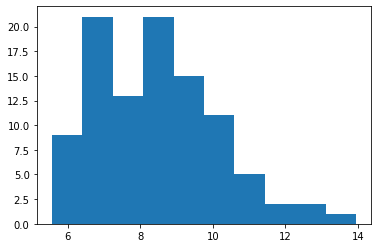

In [53]:
plt.hist(max_el)

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [57]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
%matplotlib inline

In [58]:
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [ ]:
df['CancellationCode'].value_counts()
# Самая частая причина отмены рейса - carrier. Перевозчик сам отменил рейс.

Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [ ]:
print("Average distance - ", df['Distance'].mean())
print("Minimum distance - ", df['Distance'].min())
print("Maximum distance - ", df['Distance'].max())

 Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [ ]:
df[df["Distance"] == 31]

# Рейсы с расстоянием 31 - это Alaska Airlines. Номера рейсов - 64 и 65. 
# При этом два из них были отменены по погодным условиям. Из пункта WRG->PSG и PSG->WRG.
# 31 miles - это расстояние от аэропорта PSG до WRG.
# Дни - 30 и 26 декабря, 18 и 9 августа, 28 февраля и 11 марта.

In [ ]:
df[((df["FlightNum"] == 64) | (df["FlightNum"] == 65))]['Origin'].value_counts()

In [ ]:
# Hartsfield–Jackson Atlanta International Airport - Атланта, США.

Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [ ]:
df['Origin'].value_counts()

In [ ]:
# Hartsfield–Jackson Atlanta International Airport - Атланта, США.

Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [ ]:
mean_AirTime = df.groupby(df['Origin'])['AirTime'].mean()
mean_AirTime.reset_index().sort_values('AirTime', ascending=False)

#SJU - Luis Munoz Marin International, Puerto Rico

Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [ ]:
subDf = df[df['DepDelay']>0].groupby(df['Origin'])["Origin"].count()[lambda x: x > 1000]
for airport in subDf.index:
    val_cnts = subDf[airport]
    den = df[(df['Origin'] == airport)]['Origin'].value_counts()[airport]
    print(airport, 'ratio :', val_cnts/den)

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [ ]:
df[df['DepDelay'].isna()]
# ДА, имеются пропущенные значения целевой переменной.
# Причина в том, что рейсы были отменены до вылета.
# Можно исключить признак Cancelled и CancellationCode, Year

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [59]:
df.drop(columns = ['Year','TailNum','Cancelled','CancellationCode'], inplace = True)

df = df[df['DepDelay'] != 0]
df = df[df['DepDelay'].notna()]

df = df.reset_index()
for col in ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"]:
    name_hour = col + "_Hour"
    name_min = col + "_Min"
    df[name_min] = df[col] % 100
    df[name_hour] = (df[col] - df[name_min])/100
    df = df.drop(columns = [col])

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [60]:
df.corrwith(df['DepDelay'])

index               -0.001723
Month               -0.029528
DayofMonth           0.008574
DayOfWeek            0.008530
FlightNum            0.021166
ActualElapsedTime    0.041946
CRSElapsedTime       0.034302
AirTime              0.025237
ArrDelay             0.933526
DepDelay             1.000000
Distance             0.024252
TaxiIn               0.020640
TaxiOut              0.101294
Diverted             0.027166
CarrierDelay         0.532696
WeatherDelay         0.238872
NASDelay             0.171591
SecurityDelay        0.010668
LateAircraftDelay    0.553806
DepTime_Min         -0.017055
DepTime_Hour         0.203125
CRSDepTime_Min       0.022437
CRSDepTime_Hour      0.140084
ArrTime_Min          0.006171
ArrTime_Hour         0.070181
CRSArrTime_Min       0.008609
CRSArrTime_Hour      0.135561
dtype: float64

In [61]:
df.drop(columns = ['ArrDelay'], inplace = True)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

In [62]:
df = df.drop(columns = ['index'])
df.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Min,DepTime_Hour,CRSDepTime_Min,CRSDepTime_Hour,ArrTime_Min,ArrTime_Hour,CRSArrTime_Min,CRSArrTime_Hour
0,6,18,3,WN,242,57.0,65.0,46.0,16.0,MDW,CLE,307,3.0,8.0,0,NaN,NaN,NaN,NaN,NaN,11.0,21.0,55,20.0,8.0,23.0,0,23.0
1,6,4,3,XE,2380,124.0,138.0,108.0,16.0,IAH,AVL,834,4.0,12.0,0,NaN,NaN,NaN,NaN,NaN,26.0,14.0,10,14.0,30.0,17.0,28,17.0
2,8,3,7,WN,1769,138.0,155.0,125.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,NaN,NaN,NaN,NaN,43.0,11.0,45,11.0,1.0,15.0,20,15.0
3,1,23,3,OO,3802,102.0,111.0,79.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,NaN,NaN,NaN,NaN,41.0,11.0,44,11.0,23.0,13.0,35,13.0
4,5,4,7,WN,399,148.0,160.0,136.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN,15.0,8.0,20,8.0,43.0,12.0,0,13.0


In [63]:
df.isna().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
UniqueCarrier            0
FlightNum                0
ActualElapsedTime      164
CRSElapsedTime           5
AirTime                164
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 140
TaxiOut                  7
Diverted                 0
CarrierDelay         48538
WeatherDelay         48538
NASDelay             48538
SecurityDelay        48538
LateAircraftDelay    48538
DepTime_Min              0
DepTime_Hour             0
CRSDepTime_Min           0
CRSDepTime_Hour          0
ArrTime_Min            140
ArrTime_Hour           140
CRSArrTime_Min           0
CRSArrTime_Hour          0
dtype: int64

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

In [65]:
"""Данные имеют разное распределение и разные масштабы. Стандартизация данных позволяет приводить данные к среднему = 0 и 
ско = 1.
При большом разбросе в данных коэффициенты при переменных могут быть очень маленькими.
Не думаю, что "FlightNum" можно считать вещественным признаком. Это скорее категориальный.
"""

'Данные имеют разное распределение и разные масштабы. Стандартизация данных позволяет приводить данные к среднему = 0 и ско = 1.\nПри большом разбросе в данных коэффициенты при переменных могут быть очень маленькими.\nНе думаю, что "FlightNum" можно считать вещественным признаком. Это скорее категориальный.\n'

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [66]:
categorical = ['UniqueCarrier','Origin','Dest','Month', 'DayofMonth','DayOfWeek','FlightNum']
binary = ['Diverted']
integer_vals = ['WeatherDelay','NASDelay','SecurityDelay',
                'Distance','TaxiIn','TaxiOut','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','CarrierDelay',
               'LateAircraftDelay','ArrTime_Hour','ArrTime_Min']
def transform_data(data):
    for c in data.columns:
        if c in categorical:
            data[c] = data[c].fillna('nan')
            dummies = pd.get_dummies(data[c]).rename(columns=lambda x: str(c) + "_" + str(x))
            data = pd.concat([data, dummies], axis=1)
            data = data.drop([c], axis=1)
        elif c in integer_vals:
            data[c] = data[c].fillna(0)
            sc = StandardScaler()
            data[c] = sc.fit_transform(data[c].values.reshape(-1,1))
    return data

In [67]:
df = transform_data(df)
df.shape

(63404, 7567)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [68]:
drop_cols = ['UniqueCarrier_9E','Origin_ABE','Dest_ABE','Month_1','DayofMonth_3','DayOfWeek_3','FlightNum_65']
df.drop(columns = drop_cols, inplace = True)

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [69]:
y = df['DepDelay']
X = df.drop(columns = ['DepDelay'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(44382, 7559) (44382,)
(19022, 7559) (19022,)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [71]:
linReg = LinearRegression(n_jobs = 4)
X_trains, y_trains = X_train[:1000], y_train[:1000]
linReg.fit(X_trains, y_trains)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [101]:
y_pred = linReg.predict(X_trains).reshape(-1,1)
print("R^2 train :", linReg.score(X_trains, np.array(y_trains).reshape(-1,1)))
print("MSE train :", mse(y_pred, y_trains))

y_pred = linReg.predict(X_test).reshape(-1,1)
print("R^2 train :", linReg.score(X_test, np.array(y_test).reshape(-1,1)))
print("MSE train :", mse(y_pred, y_test))


R^2 train : 1.0
MSE train : 3.2879952207931793e-26
R^2 train : 0.8718022405373687
MSE train : 0.12744426199144926


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [105]:
LassoReg = Lasso(fit_intercept=False)
lasso_params = {'alpha':np.linspace(0.001,3,50)}
clf = GridSearchCV(LassoReg, lasso_params, cv = 5, verbose = True, n_jobs = -1)
best_modelL = clf.fit(X_trains, y_trains)
RidgeReg = Ridge(fit_intercept=False)
ridge_params = {'alpha':np.linspace(0.001,3,50)}
clf = GridSearchCV(RidgeReg, ridge_params, cv = 5, verbose = True,  n_jobs = -1)
best_modelR = clf.fit(X_trains, y_trains)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   22.1s finished


In [106]:
print(best_modelR.best_score_)
print(best_modelL.best_score_)

-0.8654499400837785
0.8818857125511841


### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [104]:
X['ones'] = np.ones(X.shape[0])

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [110]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.matmul(X,w.T)

# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    y_pred = make_pred(X, w)
    return np.mean(np.square(((y - y_pred) / y)), axis=0)

# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    z = make_pred(X, w)
    n = y.shape[0] 
    dz = (2/n)*((z - y)/ y**2)    
    dw = np.matmul(dz.T, X)
    return dw

def mspe(y, y_pred):
    return np.mean(np.square(((y - y_pred) / y)), axis=0)

# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(y_pred, y, w):
    return np.mean(np.square(((y - y_pred) / y)), axis=0) + np.square(np.linalg.norm(w))

# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    z = make_pred(X, w)
    n = y.shape[0] 
    dz = (2/n)*((z - y)/ y**2)    
    dw = np.matmul(dz.T, X) + 2 * np.linalg.norm(w)
    return dw



**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [111]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg = True) -> tuple:
    w = w0.copy()
    diff = 1.0
    costs = []
    i = 0
    for i in range(1, max_iter):
        z = make_pred(X, w)
        
        if is_reg:
            err = get_reg_func(z, y, w)
            #print(norm(w))
            dw = get_reg_grad(w, X, y)
        else:
            err = mspe(y, z)
            dw = get_grad(w, X, y)
         
        costs.append(err)
        step = step_size * dw
        if norm(step) < eps or err > costs[0]:
            print("Epsilon rule stop")
            break
        w = w - step_size * dw
        if i %1000 == 0:
            print(f"i = {i}/{max_iter} {i/max_iter * 100} %) ")
            print("MSPE :", mspe(y, z))
            print("-----")
    plt.plot(costs, label = 'MSPE')
    s = f"is_reg = {is_reg}"
    plt.title(s)
    plt.legend()
    plt.show()
    return w, costs

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

Epsilon rule stop


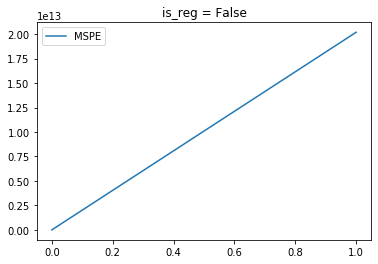

Epsilon rule stop


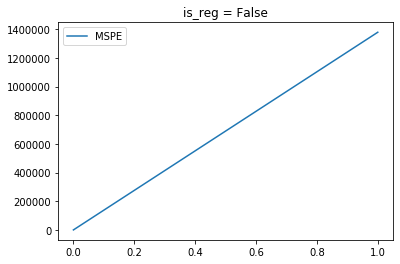

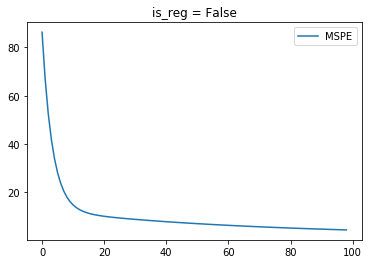

In [112]:
reg = False
for sz in [1, 0.0001, 0.0000001]:
    w0 = np.random.randn(1, X_trains.shape[1]) * 0.01
    weights, costs = grad_descent(np.array(X_trains), np.array(y_trains).reshape(-1,1), w0, step_size = sz,\
                              eps = 0.000001, max_iter = 100, is_reg = reg)

Epsilon rule stop


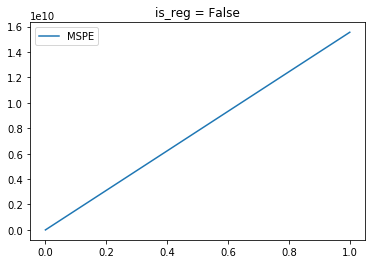

Epsilon rule stop


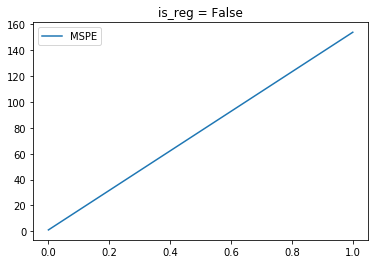

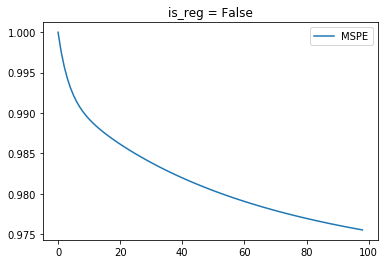

In [114]:
reg = False
for sz in [1, 0.0001, 0.0000001]:
    w0 = np.zeros(shape = (1, X_trains.shape[1]))
    weights, costs = grad_descent(np.array(X_trains), np.array(y_trains).reshape(-1,1), w0, step_size = sz,\
                              eps = 0.000001, max_iter = 100, is_reg = reg)

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

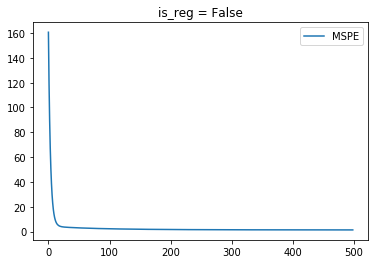

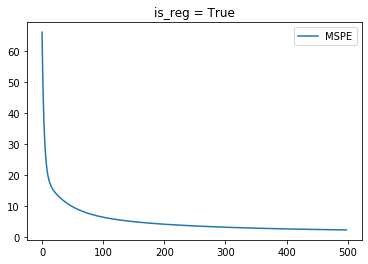

In [116]:
reg = False
w0 = np.random.randn(1, X_trains.shape[1]) * 0.01
weights, costs = grad_descent(np.array(X_trains), np.array(y_trains).reshape(-1,1), w0, step_size = 0.0000001,\
                              eps = 0.000001, max_iter = 500, is_reg = reg)
reg = True
w0 = np.random.randn(1, X_trains.shape[1]) * 0.01
weights, costs = grad_descent(np.array(X_trains), np.array(y_trains).reshape(-1,1), w0, step_size = 0.0000001,\
                              eps = 0.000001, max_iter = 500, is_reg = reg)

Epsilon rule stop


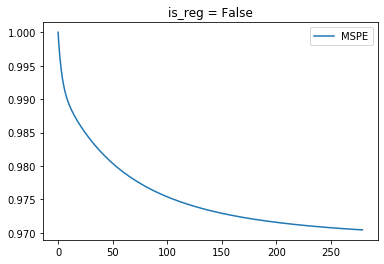

Epsilon rule stop


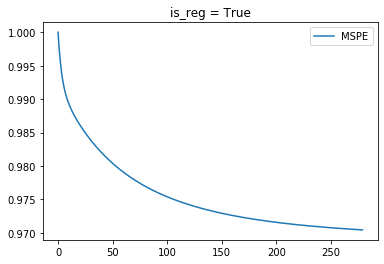

In [115]:
reg = False
w0 = np.zeros((1, X_trains.shape[1]))
weights, costs = grad_descent(np.array(X_trains), np.array(y_trains).reshape(-1,1), w0, step_size = 0.0000001,\
                              eps = 0.000001, max_iter = 500, is_reg = reg)
reg = True
w0 = np.zeros((1, X_trains.shape[1]))
weights, costs = grad_descent(np.array(X_trains), np.array(y_trains).reshape(-1,1), w0, step_size = 0.0000001,\
                              eps = 0.000001, max_iter = 500, is_reg = reg)

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [119]:
def sgd(X, y, X_test, y_test, w0, step_size, max_iter, eps, is_reg, batch_size = 32):
    w = w0.copy()
    diff = 1.0
    costs = []
    costs_mse = []
    test_mse = []
    i = 0
    for i in range(1, max_iter):
        pred = make_pred(X, w)
        costs_mse.append(mse(y, pred))
        err = get_reg_func(pred, y, w) if reg else mspe(y, pred) 
        costs.append(err)
        
        test_pred = make_pred(X_test, w)
        test_mse.append(mse(test_pred, y_test))
        
        rand_index = np.random.randint(0,X.shape[0],size = batch_size)
        X_item = X[rand_index].reshape(batch_size,-1)
        y_item = y[rand_index]
        if is_reg:
            dw = get_reg_grad(w, X_item, y_item)
        else:
            dw = get_grad(w, X_item, y_item)
        step = step_size * dw
        if abs(norm(step)) < eps:
            print("Epsilon Break")
            break
        w = w - step_size*dw
        if i % 500 == 0:
            print(f"i = {i}/{max_iter} {i/max_iter * 100} %) ")
            print("MSPE :", err)
            print("-----")   
    pred = make_pred(X, w)
    print("TRAIN MSPE: ", mspe(y, pred) )
    print("TRAIN MSE: ", mse(y, pred))
    print("TRAIN R2 : ", r2_score(y, pred))
    print("----------")
    pred = make_pred(X_test, w)
    print("TEST MSPE: ", mspe(y_test, pred) )
    print("TEST MSE: ", mse(y_test, pred))
    print("TEST R2 : ", r2_score(y_test, pred))

    plt.plot(costs, label = 'MSPE train')
    plt.legend()
    plt.show()
    return w, costs

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

i = 500/1000 50.0 %) 
MSPE : [2.23765741]
-----
TRAIN MSPE:  [1.37959378]
TRAIN MSE:  0.8484880648371422
TRAIN R2 :  -0.05043318465066693
----------
TEST MSPE:  [2.14741098]
TEST MSE:  1.0249050836794087
TEST R2 :  -0.03096470046157429


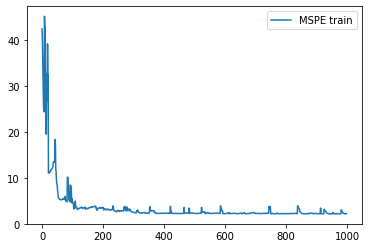

i = 500/1000 50.0 %) 
MSPE : [2.21329026]
-----
TRAIN MSPE:  [1.34256405]
TRAIN MSE:  0.8499375731625571
TRAIN R2 :  -0.052227684431563004
----------
TEST MSPE:  [2.10848514]
TEST MSE:  1.026059154183435
TEST R2 :  -0.03212559425597661


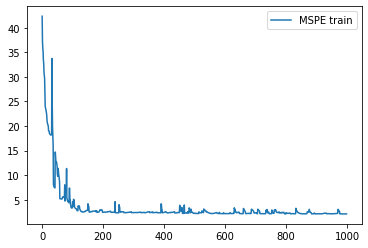

In [121]:
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1,1)
w0 = np.random.randn(1, X_trains.shape[1]) * 0.01
weights, costs1 = sgd(np.array(X_trains), np.array(y_trains).reshape(-1,1),X_test, y_test, w0, \
                     step_size = 0.00000015, max_iter = 1000, eps = 0.0000001, is_reg = False)
weights, costs2 = sgd(np.array(X_trains), np.array(y_trains).reshape(-1,1), X_test, y_test, w0, \
                     step_size = 0.00000015, max_iter = 1000, eps = 0.0000001, is_reg = True)

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

i = 0/15000 0.0 %) 
MSPE : [612.92999036]
MSE : [3.7887663568004584]
-----
i = 1000/15000 6.666666666666667 %) 
MSPE : [2.06414288]
MSE : [0.6837876834929368]
-----
i = 2000/15000 13.333333333333334 %) 
MSPE : [1.91441551]
MSE : [0.5808626584104529]
-----
i = 3000/15000 20.0 %) 
MSPE : [2.0616541]
MSE : [0.49981825356208553]
-----
i = 4000/15000 26.666666666666668 %) 
MSPE : [2.37192631]
MSE : [0.4347124594773358]
-----
i = 5000/15000 33.33333333333333 %) 
MSPE : [2.77719358]
MSE : [0.38154534163561776]
-----
i = 6000/15000 40.0 %) 
MSPE : [3.24172842]
MSE : [0.3375399817151502]
-----
i = 7000/15000 46.666666666666664 %) 
MSPE : [3.74573595]
MSE : [0.30071491411829926]
-----
i = 8000/15000 53.333333333333336 %) 
MSPE : [4.27729952]
MSE : [0.269620743676397]
-----
i = 9000/15000 60.0 %) 
MSPE : [4.82841392]
MSE : [0.24317288853943345]
-----
i = 10000/15000 66.66666666666666 %) 
MSPE : [5.39304901]
MSE : [0.22054259358072306]
-----
i = 11000/15000 73.33333333333333 %) 
MSPE : [5.96622659

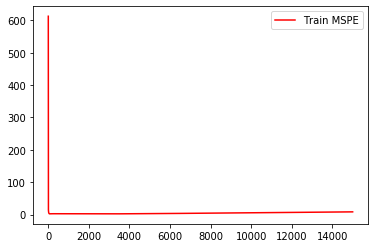

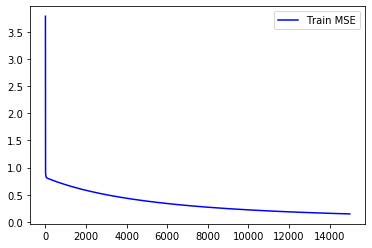

R2 test:  0.8141646993321092
MSE test : 0.18474303174137782
MSPE test : [18.45008525]


In [123]:
def init_weights(lenw):
    w = np.random.randn(1, lenw) * 0.1
    return w
def forward(X, w):
    return np.matmul(X,w.T)
def back_prop(X, y, z):
    n = y.shape[0] 
    dz = (1/n)*(z - y)    
    dw = np.matmul(dz.T, X)
    return dw
def grad_update(w, dw, lr):
    w = w - dw * lr
    return w

def lin_reg(X, y, X_test, y_test, max_iter, lr):
    w = init_weights(X.shape[1]) * 0.1
    costs = []
    mse_arr = []
    for i in range(max_iter):
        z = forward(X,w)
        dw = back_prop(X, y, z)
        w = grad_update(w,dw,lr)
        
        err = mspe(y, z)
        costs.append(err)
        mse_arr.append(mse(y, z))
        
        if i % 1000 == 0:
            print(f"i = {i}/{max_iter} {i/max_iter * 100} %) ")
            print("MSPE :", err)
            print("MSE :" , [mse_arr[i]])
            print("-----") 
            
    pred = make_pred(X_test, w)
    print("TEST MSPE: ", mspe(y_test, pred) )
    print("TEST MSE: ", mse(y_test, pred))
    print("TEST R2 : ", r2_score(y_test, pred))
    
    plt.plot(costs, color  = 'r', label = 'Train MSPE')
    plt.legend()
    plt.show()
    plt.plot(mse_arr, color = 'b', label = 'Train MSE')
    plt.legend()
    plt.show()
    return w

w = lin_reg(np.array(X_trains), np.array(y_trains).reshape(-1,1), X_test, y_test,\
           15000, 0.0001)
test_pred = make_pred(np.array(X_test), w)

print("R2 test: ", r2_score(y_test, test_pred))
print("MSE test :" , mse(test_pred, y_test))
print("MSPE test :" , mspe(np.array(y_test).reshape(-1,1), test_pred.reshape(-1,1)))

Здесь вы можете поделиться своими мыслями по поводу этого задания.

# Комментарий
Если обучать линейную регрессию с минимизацией MSE, то MSE падает, но при этом MSPE не падает. 
Если обучить линейную регрессию с минимизацией MSPE, то MSPE падает, а MSE нет. 
Могу предположить, что я считаю градиент или саму метрику неправильно.
Но если значение функционала падает от итерации к итерации, то скорее всего просто метрика не подходит к набору данных. 

Действительно, если в MSPE передаётся y_true = 0, то происходит деление не 0 и значение функционала уходит в бесконечность, 
а т.к. при стандартизации DepDelay возникает множество значений близких к 0, то возможно  MSPE не лучший выбор.


А здесь — вставить вашу любимую картинку.

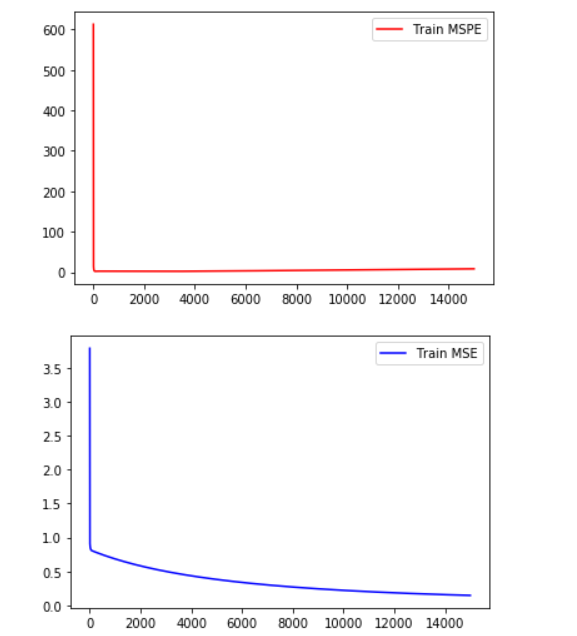